# 1 Author

**Student Name**:  Tushara Govinda Reddy
**Student ID**:  EC211256



# 2 Problem formulation

To build and deploy multiclass superivsed learning classification models using 3 different machine learning models and compare their performance and accuracies to find the best fit model.

# 3 Machine Learning pipeline

The Machine Learning Pipeline of this project acan be described as mount the drive> data preprocessed by removing samples that don't follow the nomenclature> extract four features of the audio dataset (pitch(mean, standard deviation),fraction of voiced region and power)>Normalise the features> train the model using 4 Classification models(1. Support Vector Mechanism, 2.K Nearest Neighbour 3. Naive Bayes and 4.Logistic Regression) > Evaluate the model using training and validation dataset by comparirng their accuracies.

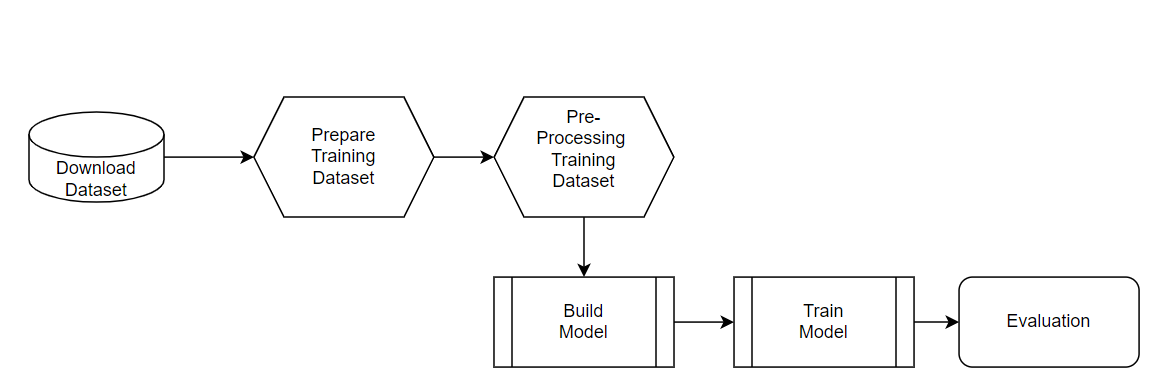

Input: "Potter" and "StarWars" Dataset X_train and y_train
Output: yt_p and yv_p prediction of y training and y validation

# 4 Transformation stage

Audio files contain numerous features hence extracting 4 brings down the complexity of analysis to 4 predictor variables using NumPy

1. Power: Proportional to the amplitude of the signal
2. Pitch mean: The mean is the average value and can be calculated as:mean = sum(x)/n * count(x)
3. Pitch standard deviation:The standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1
4. Fraction of voiced region: Fragment of the sampling frequency





#Environment set up

In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


#Data download

In [4]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

Downloading the data onto a common folder in the Gdrive> /content/drive/MyDrive/Data/MLEndHW/

In [5]:
url1  = "https://collect.qmul.ac.uk/down?t=45O07QG5SKLC2TKN/6PEIJD5VEBGBEUSOHNLOA9G"
save_path1 = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample1.zip'
download_url(url1, save_path1)

In [6]:
url2  = "https://collect.qmul.ac.uk/down?t=4P72B2L5GL523LHN/45P01OI1U1H0JI9A71FJD5O"
save_path2 = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample2.zip'
download_url(url2, save_path2)

In [7]:
url3  = "https://collect.qmul.ac.uk/down?t=6H02BFJHA636Q8I3/6L6THHTCDNMO8DINPONDPU0"
save_path3 = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample3.zip'
download_url(url3, save_path3)

In [8]:
url4  = "https://collect.qmul.ac.uk/down?t=5D2T3KJDBM97IFIV/6502927BLQM47TOK1HHGRD8"
save_path4 = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample4.zip'
download_url(url4, save_path4)

To check that the MLEndHW folder contains the file 'MLEndHW_Sample.zip'

In [9]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['sample',
 'PottervsStarwars',
 'Binary',
 'MLEndHW_Sample1.zip',
 'MLEndHW_Sample2.zip',
 'MLEndHW_Sample3.zip',
 'MLEndHW_Sample4.zip',
 'MultiClass',
 'PottervsStarwars1',
 'MLEndHW_SampleB.zip',
 'MLEndHW_SampleA.zip']

#Understanding our dataset sample
Unzip the sample data and find the count of total files downloaded.

In [10]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/MultiClass/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample3.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample4.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
sample_path = '/content/drive/MyDrive/Data/MLEndHW/MultiClass/*.wav'
files = glob.glob(sample_path)
len(files)

850

In [11]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/MultiClass/*.wav'
files = glob.glob(sample_path)
len(files)

850

In [12]:
for file in files:
  print(file.split('/')[-1])

S1_hum_2_Panther.wav
S1_whistle_1_Panther.wav
S2_hum_2_Panther.wav
S2_whistle_1_Panther.wav
S3_hum_2_Panther.wav
S3_whistle_1_Panther.wav
S4_hum_2_Panther.wav
S4_hum_4_Panther.wav
S5_hum_1_PinkPanther.wav
S5_hum_4_PinkPanther.wav
S6_hum_1_Panther.wav
S6_hum_2_Panther.wav
S7_hum_2_Panther.wav
S7_hum_4_Panther.wav
S8_hum_1_[Panther].wav
S8_hum_2_[Panther].wav
S9_hum_2_Panther.wav
S9_hum_4_Panther.wav
S10_hum_2_Panther.wav
S10_hum_4_Panther.wav
S12_hum_2_Panther.wav
S12_hum_4_Panther.wav
S13_hum_2_Panther.wav
S13_hum_4_Panther.wav
S14_hum_2_Panther.wav
S14_hum_4_Panther.wav
S15_hum_2_Panther.wav
S15_whistle_1_Panther.wav
S16_hum_2_Panther.wav
S16_whistle_1_Panther.wav
S17_hum_2_Panther.wav
S17_hum_4_Panther.wav
S18_Hum_2_Panther.wav
S18_Whistle_1_Panther.wav
S19_hum_2_Panther.wav
S19_hum_4_Panther.wav
S20_hum_2_Panther.wav
S20_hum_4_Panther.wav
S21_hum_2_Panther.wav
S21_hum_4_Panther.wav
S22_hum_2_Panther.wav
S22_hum_4_Panther.wav
S23_hum_2_Panther.wav
S23_hum_4_Panther.wav
S24_hum_2_Pant

The name of each file follows the naming convention [Participant ID]_[type of recording]_[interpretation number]_[song]. We can parse each file name and extract this information. 

In [13]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('    The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/MLEndHW/MultiClass/S1_hum_2_Panther.wav


    The name of the first audio file is:  S1_hum_2_Panther.wav
    The participand ID is:  S1
    The type of interpretation is:  hum
    The interpretation number is:  2
    The song is:  Panther.wav


#Data Preprocessing

We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [14]:
song_name_mapping={
    "Potter":['harry','potterwav','harrypotter'],
    "StarWars":['star','starswars','startwars','starwar','statwars','imperial','march'],
    "Panther":['panter','pink','pinkpanther'],
    "Rain":['singing','singingintherain'],
    "Hakuna":['hakana','haknua','hakunamatata','hukuna'],
    "Mamma":['mummamia','mumma','mamia','mamamia','mama'],
    "Showman":['this','thisisme','snowman'],
    "Frozen":['letitgo']
}

In [15]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/MultiClass/*.wav'
files = glob.glob(sample_path)
print('count',len(files))

MLENDHW_table = [] 

for file in files:

  try:
    file_id = file.split('/')[-1]
    file_name = file.split('/')[-1]
    file_name=file_name.replace(' ','_')
    file_name=file_name.replace('[','_')
    file_name=file_name.replace(']','_')
    file_name=file_name.replace('(','_')
    file_name=file_name.replace(')','_')
    file_name=file_name.replace('__','_')
    file_name=file_name.replace('__','_')
    file_name=file_name.replace('_.','.')
    file_name=file_name.lower()

    participant_ID = file_name.split('_')[0]
    interpretation_type = file_name.split('_')[1]
    interpretation_number = file_name.split('_')[2]
    song = file_name.split('_')[3].split('.')[0]
    if song=='1' or song=='2':
      interpretation_type = file_name.split('_')[2]
      interpretation_number = file_name.split('_')[3].split('.')[0]
      song = file_name.split('_')[1]

    for key,val in song_name_mapping.items():
      if song in val:
        song=key.lower()
  except Exception as e:
    print(file_name)

  MLENDHW_table.append([file_id,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
print(MLENDHW_df.count())

count 850
s42_hum1_hakuna.wav
s42_hum3_hakuna.wav
s42_hum1_mamma.wav
s42_hum2_mamma.wav
participant       850
interpretation    850
number            850
song              850
dtype: int64


In [48]:
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S1_hum_2_Panther.wav,s1,hum,2,panther
S1_whistle_1_Panther.wav,s1,whistle,1,panther
S2_hum_2_Panther.wav,s2,hum,2,panther
S2_whistle_1_Panther.wav,s2,whistle,1,panther
S3_hum_2_Panther.wav,s3,hum,2,panther
...,...,...,...,...
S42_Hum_2_Mamma.wav,s42,hum,2,mamma
S42_Hum1_Hakuna.wav,s42,hum1,hakuna.wav,mamma
S42_Hum3_Hakuna.wav,s42,hum3,hakuna.wav,mamma


In [16]:
MLENDHW_df.groupby('song').size()

song
hakuna     213
mamma      221
panther    208
rain       208
dtype: int64

We can load the table into a Pandas DataFrame and usie the additional functionalities of Pandas to explore the information extracted from the names of the audio files.

#Feature extraction : Pitch


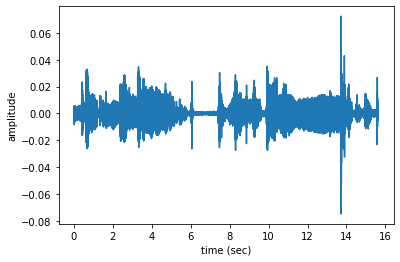

In [17]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

However, the information from the label shows that the audio file indeed is of type- hum, song- Potter. Which indicates that there could be mismatch in the labelling and

In [18]:
MLENDHW_df.loc[files[n].split('/')[-1]]

participant            s1
interpretation        hum
number                  2
song              panther
Name: S1_hum_2_Panther.wav, dtype: object

In [19]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 689547 samples


In [20]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [23]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X =[]
  y = []
  digit_labels = {
'panther':1,
'rain':2,
'hakuna':3,
'mamma':4
}
  for file in tqdm(files):
    try:
      fileID = file.split('/')[-1]
      file_name = file.split('/')[-1]
      yi = digit_labels[labels_file.loc[fileID]['song']]

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
        
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)
    except:
         pass
        
  return np.array(X),np.array(y)

In [24]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 850/850 [37:44<00:00,  2.66s/it]


In [25]:
np.savetxt('X_w.csv', X,delimiter=',')
np.savetxt('y_w.csv', y,delimiter=',')
print('The shape of X is', X.shape)
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (850, 4)
The shape of y is (850,)
The labels vector is [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [26]:
print(' The number of Panther recordings is ', np.count_nonzero(y==1))
print(' The number of Rain recordings is ', np.count_nonzero(y==2))
print(' The number of Hakuna recordings is ', np.count_nonzero(y==3))
print(' The number of Mamma recordings is ', np.count_nonzero(y==4))

 The number of Panther recordings is  208
 The number of Rain recordings is  208
 The number of Hakuna recordings is  213
 The number of Mamma recordings is  221


# 5 Modelling:

We split the dataset into 80:20 ratio to train the model with a balanced dataset of 850 audio files of 4 different sample sets. We extract 4 of their features to limit the complexity of the audio files. Audio classification for multiclass can be achived using the below four machine leanring models:

1. Support Vector Machine: SVM algorithms classify data and train models within super finite degrees of polarity, creating a 3-dimensional classification model that goes beyond just X/Y predictive axes
2. Naive Bayes:This is the second most preferred probability classifier used in case of binary (two-class) or multiclass classification problems to find the probability of a dataset to belong to one of the classes.
4. KNN Classifier: K-nearest neighbors (k-NN) is a pattern recognition algorithm that stores and learns from training data points by calculating how they correspond to other data in n-dimensional space. K-NN aims to find the k closest related data points in future, unseen data

# 6 Methodology
This is a binary classification problem which falls under supervised learning, we would split the dataset into training and validation dataset with 60:40 ratio 60% being used to train the model and other 40% being used to test the model.
Then we would build the SVM, Naive Bayes and KNN models for the training data and validate it using the testing data to find accuracies and confusion matrix, evaluate the model and see if it is fitting, underfitting or overfitting. Ideally, we would aim for a model that fits with a good margin for predicition.

# 7 Dataset

**Balanced Dataset:**
Total Number of Files: 850
Panther Files: 208
Rain Files: 208
Hakuna Files:213
Mamma Files:221

Hence we can clear conclude the data is a balanced dataset, we dont need to stratify. However we could stratify the data to keep a good balance of all classes.

**Data Pre-Processing:**
The labels of each file are split, any additional special characters are removed and the required fields are tabulated in MLENDHM_table. We obtain 850X4 table, with corrected labels.

**Feature Extration**
Using Librosa and NumPy we extract 4 features of the audi files, use them to create the predictor X and label prediction y, each of shape X is (850, 4)
and y is (850,).

# 8 Results

**Method 1**: Support Vector Modelling :Here we are performing the prediction of identifying the type of song of an audio file using the "Potter" and "Starwars" dataset. Since it is a binary classification problem we can employ the Support Vecotr Machine model, which performs best for supervised learning that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

We will use the SVM method provided by scikit-learn and will split the dataset defined by X and y into a training set and a validation set. We make use of Librosa for feature extraction.

In [70]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((680, 4), (170, 4), (680,), (170,))

Let's now fit an SVM model and print both the training accuracy and validation accuracy

In [71]:
model  = svm.SVC(C=1,kernel='rbf')
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.35441176470588237
Validation  Accuracy 0.31176470588235294
The support vectors are (679, 4)





Let's normalise the predictors, to see if the performance improves.

In [72]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.6911764705882353
Validation  Accuracy 0.4588235294117647
The support vectors are (640, 4)


It is quiet evident that the model has performed well for the given datset and kernel= 'rfb' however, ideally svm is used for data that is highly dimenionalas compared to its volume. Here the data has 4 columns and around 850 rows, which is why the SVM validation accuracy is 45% which is not a great fit compared to its training accuracy 69%, however, the model fits mediocrely well. We can further explore KNN and Naive Bayes to see how they perform.

In [73]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train))
train_confusion_matrix_normalised = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]

val_confusion_matrix = confusion_matrix(y_true=y_val, y_pred=model.predict(X_val))
val_confusion_matrix_normalised = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised))

Training confusion matrix:
 [[106  18  21  22]
 [ 22 116  22   6]
 [ 12   9 114  35]
 [ 13   7  23 134]]

Validation confusion matrix:
 [[13  6 11 11]
 [10 23  9  0]
 [ 9  3 14 17]
 [ 8  1  7 28]]

Normalised training confusion matrix:
 [[0.63473054 0.10778443 0.1257485  0.13173653]
 [0.13253012 0.69879518 0.13253012 0.03614458]
 [0.07058824 0.05294118 0.67058824 0.20588235]
 [0.07344633 0.03954802 0.1299435  0.75706215]]

Normalised validation confusion matrix:
 [[0.31707317 0.14634146 0.26829268 0.26829268]
 [0.23809524 0.54761905 0.21428571 0.        ]
 [0.20930233 0.06976744 0.3255814  0.39534884]
 [0.18181818 0.02272727 0.15909091 0.63636364]]



In [74]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
  # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val,yv_p)
print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
precision = precision_score(y_val,yv_p,average='macro')
print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
recall = recall_score(y_val,yv_p,average='macro')
print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val,yv_p,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.458824
Precision: 0.465858
Recall: 0.456659
F1 score: 0.456914


For the SVM Model the performance parameters are all around 45% which means the model missclassifies 55% of the data on the whole, while performing at 45% accuracy.

In [91]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, yv_p, target_names=['Panther', 'Rain', 'Hakuna','Mamma']))


Classification Report

              precision    recall  f1-score   support

     Panther       0.33      0.32      0.32        41
        Rain       0.70      0.55      0.61        42
      Hakuna       0.34      0.33      0.33        43
       Mamma       0.50      0.64      0.56        44

    accuracy                           0.46       170
   macro avg       0.47      0.46      0.46       170
weighted avg       0.47      0.46      0.46       170



SVM model for the mutliclass model works at best precision for the 'Rain' class at 70%, fairly good recall 55% and f1score 61%. Also the model identifies the class 'Mamma' mediocrely well by having a high sensitivty rate for the true positive rate at 64%.

**Method 2: K NN Classifier**

We use a K range of 1 to 75 with an interval of 5, we create the K nearest neighbout model for the training dataset and test the model with the testing data. KNN performs clusters of data with nearest probablity neighbours. Here in an aduio data it slightly challenging to do so given the complexity of the data.

In [75]:
from google.colab import widgets
from sklearn import neighbors
from matplotlib.colors import ListedColormap

k_values = range(1,75,5)
tb = widgets.TabBar([str(k) for k in k_values])

accuracy_t = dict.fromkeys(k_values)
accuracy_v = dict.fromkeys(k_values)

for k in k_values:
  with tb.output_to(str(k), select= (k < 2)):

    # First we create the kNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Finally we calculate the validation accuracy
    y_val_pred = knn.predict(X_val)
    accuracy_v[k] = np.sum(y_val==y_val_pred)/len(y_val)

    # Training accuracy
    y_train_pred = knn.predict(X_train)
    accuracy_t[k] = np.sum(y_train==y_train_pred)/len(y_train)

    print("The training accuracy for k=", k, "is ", accuracy_t[k])
    print("The validation accuracy for k=", k, "is ", accuracy_v[k])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 1 is  0.9985294117647059
The validation accuracy for k= 1 is  0.43529411764705883


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 6 is  0.575
The validation accuracy for k= 6 is  0.38823529411764707


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 11 is  0.5426470588235294
The validation accuracy for k= 11 is  0.48823529411764705


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 16 is  0.49558823529411766
The validation accuracy for k= 16 is  0.4294117647058823


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 21 is  0.5058823529411764
The validation accuracy for k= 21 is  0.4470588235294118


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 26 is  0.49411764705882355
The validation accuracy for k= 26 is  0.43529411764705883


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 31 is  0.4852941176470588
The validation accuracy for k= 31 is  0.4235294117647059


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 36 is  0.47941176470588237
The validation accuracy for k= 36 is  0.4235294117647059


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 41 is  0.46911764705882353
The validation accuracy for k= 41 is  0.4235294117647059


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 46 is  0.4573529411764706
The validation accuracy for k= 46 is  0.4647058823529412


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 51 is  0.4632352941176471
The validation accuracy for k= 51 is  0.47058823529411764


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 56 is  0.4676470588235294
The validation accuracy for k= 56 is  0.4588235294117647


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 61 is  0.4676470588235294
The validation accuracy for k= 61 is  0.4588235294117647


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 66 is  0.45588235294117646
The validation accuracy for k= 66 is  0.45294117647058824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training accuracy for k= 71 is  0.4455882352941177
The validation accuracy for k= 71 is  0.4823529411764706


<IPython.core.display.Javascript object>

It is evident from the results that the accuracy of training and validation is a good fit at K=11 where the Training acurracy is highest at 54% in comaprsion to other K values and Validation accuracy is closely fit at 49%. This is a fairly good fit model, however there is a huge scope for improvement of acuracies.

In [76]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
  # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val,y_val_pred)
print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
precision = precision_score(y_val,y_val_pred,average='macro')
print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
recall = recall_score(y_val,y_val_pred,average='macro')
print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val,y_val_pred,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.482353
Precision: 0.485777
Recall: 0.480891
F1 score: 0.480043


We can observe that though the KNN model is a fairly good fit the accuracy of prediction, Precision, recall and F1score are not more than 50%. Which indicates that more than 50% of the data is being misclassified which defies the purpose.

In [90]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, y_val_pred, target_names=['Panther', 'Rain', 'Hakuna','Mamma']))


Classification Report

              precision    recall  f1-score   support

     Panther       0.47      0.37      0.41        41
        Rain       0.64      0.60      0.62        42
      Hakuna       0.33      0.35      0.34        43
       Mamma       0.50      0.61      0.55        44

    accuracy                           0.48       170
   macro avg       0.49      0.48      0.48       170
weighted avg       0.49      0.48      0.48       170



In the classification report for KNN Model we can identify that the model works fairly well for two classes, 'Rain' and 'Mamma' were, the Precision 64% in 'Rain' is agreeably good, along with it recall 60% and f1score 62%. For 'Mamma' class however the recall or sensitivity to the true positive rate is higher at 61% incomparison to its recall 50% and precision 55%.

**Method 3: Naive Bayes**

In [85]:
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
gnb_A = GaussianNB()
model  = gnb_A.fit(X_train, y_train)
y_true= y_val
y_pred= model.predict(X_val)
print('Training accuracy : {}'.format(gnb_A.score(X_train, y_train)))
print('Validation accuracy : {}'.format(gnb_A.score(X_val, y_val)))


# Here we obtain and print the confusion matrices for the logistic regression classifier trained with data from region A
train_confusion_matrix_naive_A = confusion_matrix(y_true=y_train, y_pred=gnb_A.predict(X_train))
train_confusion_matrix_normalised_naive_A = train_confusion_matrix_naive_A.astype('float') / train_confusion_matrix_naive_A.sum(axis=1)[:, np.newaxis]

val_confusion_matrix_naive_A = confusion_matrix(y_true=y_val, y_pred=gnb_A.predict(X_val))
val_confusion_matrix_normalised_naive_A = val_confusion_matrix_naive_A.astype('float') / val_confusion_matrix_naive_A.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix_naive_A))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix_naive_A))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised_naive_A))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised_naive_A))

print('Training accuracy : {}'.format(gnb_A.score(X_train, y_train)))
print('Validation accuracy : {}'.format(gnb_A.score(X_val, y_val)))



Training accuracy : 0.40441176470588236
Validation accuracy : 0.3764705882352941
Training confusion matrix:
 [[74 22 42 29]
 [38 70 39 19]
 [32 22 92 24]
 [34 18 86 39]]

Validation confusion matrix:
 [[16  4 11 10]
 [ 9 17 12  4]
 [13  3 15 12]
 [ 8  0 20 16]]

Normalised training confusion matrix:
 [[0.44311377 0.13173653 0.25149701 0.17365269]
 [0.22891566 0.42168675 0.23493976 0.11445783]
 [0.18823529 0.12941176 0.54117647 0.14117647]
 [0.1920904  0.10169492 0.48587571 0.22033898]]

Normalised validation confusion matrix:
 [[0.3902439  0.09756098 0.26829268 0.24390244]
 [0.21428571 0.4047619  0.28571429 0.0952381 ]
 [0.30232558 0.06976744 0.34883721 0.27906977]
 [0.18181818 0.         0.45454545 0.36363636]]

Training accuracy : 0.40441176470588236
Validation accuracy : 0.3764705882352941


The best fit model so far the multiclass classification can be Naive Bayes, since we have obtained a validation accucary 38% as close to training accuracy 41% as possible, which menas the model has been trained and deployed to similar accuracy.

In [86]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
  # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true,y_pred)
print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
precision = precision_score(y_true,y_pred,average='macro')
print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
recall = recall_score(y_true,y_pred,average='macro')
print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true,y_pred,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.376471
Precision: 0.423933
Recall: 0.376870
F1 score: 0.388023


While using the Naive Bayes algorithm we can observe that the accuracy is lower around 40% however the precision is slightly better, which implies that the true class is being classified marginally better than the others.

In [89]:

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=['Panther', 'Rain', 'Hakuna','Mamma']))


Classification Report

              precision    recall  f1-score   support

     Panther       0.35      0.39      0.37        41
        Rain       0.71      0.40      0.52        42
      Hakuna       0.26      0.35      0.30        43
       Mamma       0.38      0.36      0.37        44

    accuracy                           0.38       170
   macro avg       0.42      0.38      0.39       170
weighted avg       0.42      0.38      0.39       170



Further to understand confusion matrix of 4 classes, we can draw out a report that evaluates the model for each class. In case of Naive Bayes, we can observe that Rain dataset has the highest presicion of 71%, Recall of 40% and f1-score of 52% which means there is higher chance of correct classification of true class and true samples for the Rain dataset.

# 9 Conclusions

We can conclude that for a multiclass supervised learning model using 4 different classes and extracting 4 different features, we could ideally make use of Naive Bayes's probabilty classification model to train and deploy a model of higher precision and accuracy. In the given dataset 'Rain' and 'Mamma' classes were comparitively well classified in all three models with the precision for these two classes being highest in Naive Bayes 71% and next in SVM model 64%. The KNN model however has the better overall accuracy at 48%.

The overall performance of models depends on various paameters, in case of multiclass models it would be important to focus on the precision, recall and f1score of a model rather than just focuing on the accuracy obtained.
**Thus Naive Bayes works best ofr audio files multilass supervied machine learning algorithms.**